# DS 600 Project Data Mining on Flights 

In [1]:
import pandas as pd 
import numpy as np

In [2]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.fftpack as fftpack
import warnings
warnings.filterwarnings("ignore")

In [3]:
df = pd.read_csv('airline.csv')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 277374 entries, 0 to 277373
Data columns (total 21 columns):
year                   277374 non-null int64
month                  277374 non-null int64
carrier                277374 non-null object
carrier_name           277374 non-null object
airport                277374 non-null object
airport_name           277374 non-null object
arr_flights            276999 non-null float64
arr_del15              276941 non-null float64
carrier_ct             276999 non-null float64
weather_ct             276999 non-null float64
nas_ct                 276999 non-null float64
security_ct            276999 non-null float64
late_aircraft_ct       276999 non-null float64
arr_cancelled          276999 non-null float64
arr_diverted           276999 non-null float64
arr_delay              276999 non-null float64
carrier_delay          276999 non-null float64
weather_delay          276999 non-null float64
nas_delay              276999 non-null float64
secu

In [5]:
df.head()

,year,month,carrier,carrier_name,airport,airport_name,arr_flights,arr_del15,carrier_ct,weather_ct,...,security_ct,late_aircraft_ct,arr_cancelled,arr_diverted,arr_delay,carrier_delay,weather_delay,nas_delay,security_delay,late_aircraft_delay
0,2004,1,DL,Delta Air Lines Inc.,PBI,"West Palm Beach/Palm Beach, FL: Palm Beach Int...",650.0,126.0,21.06,6.44,...,1.0,45.92,4.0,0.0,5425.0,881.0,397.0,2016.0,15.0,2116.0
1,2004,1,DL,Delta Air Lines Inc.,PDX,"Portland, OR: Portland International",314.0,61.0,14.09,2.61,...,0.0,10.05,30.0,3.0,2801.0,478.0,239.0,1365.0,0.0,719.0
2,2004,1,DL,Delta Air Lines Inc.,PHL,"Philadelphia, PA: Philadelphia International",513.0,97.0,27.60,0.42,...,0.0,17.12,15.0,0.0,4261.0,1150.0,16.0,2286.0,0.0,809.0
3,2004,1,DL,Delta Air Lines Inc.,PHX,"Phoenix, AZ: Phoenix Sky Harbor International",334.0,78.0,20.14,2.02,...,0.0,16.45,3.0,1.0,3400.0,1159.0,166.0,1295.0,0.0,780.0
4,2004,1,DL,Delta Air Lines Inc.,PIT,"Pittsburgh, PA: Pittsburgh International",217.0,47.0,8.08,0.44,...,0.0,16.59,4.0,1.0,1737.0,350.0,28.0,522.0,0.0,837.0


In [6]:
df.isnull().sum()

year                     0
month                    0
carrier                  0
carrier_name             0
airport                  0
airport_name             0
arr_flights            375
arr_del15              433
carrier_ct             375
weather_ct             375
nas_ct                 375
security_ct            375
late_aircraft_ct       375
arr_cancelled          375
arr_diverted           375
arr_delay              375
carrier_delay          375
weather_delay          375
nas_delay              375
security_delay         375
late_aircraft_delay    375
dtype: int64

In [7]:
df= df.dropna()

In [8]:
df.isnull().sum()

year                   0
month                  0
carrier                0
carrier_name           0
airport                0
airport_name           0
arr_flights            0
arr_del15              0
carrier_ct             0
weather_ct             0
nas_ct                 0
security_ct            0
late_aircraft_ct       0
arr_cancelled          0
arr_diverted           0
arr_delay              0
carrier_delay          0
weather_delay          0
nas_delay              0
security_delay         0
late_aircraft_delay    0
dtype: int64

In [9]:
df.nunique()

year                      18
month                     12
carrier                   28
carrier_name              32
airport                  406
airport_name             406
arr_flights             7132
arr_del15               2300
carrier_ct             17520
weather_ct              5461
nas_ct                 20456
security_ct             1098
late_aircraft_ct       21564
arr_cancelled            565
arr_diverted             137
arr_delay              26798
carrier_delay          13519
weather_delay           5149
nas_delay              13755
security_delay           629
late_aircraft_delay    17078
dtype: int64

In [10]:
df.describe()

,year,month,arr_flights,arr_del15,carrier_ct,weather_ct,nas_ct,security_ct,late_aircraft_ct,arr_cancelled,arr_diverted,arr_delay,carrier_delay,weather_delay,nas_delay,security_delay,late_aircraft_delay
count,276941.000000,276941.000000,276941.000000,276941.000000,276941.000000,276941.000000,276941.000000,276941.000000,276941.000000,276941.000000,276941.000000,276941.000000,276941.000000,276941.000000,276941.000000,276941.000000,276941.000000
mean,2011.190272,6.521432,396.809775,77.560744,21.758212,2.756241,26.010714,0.178455,26.857183,6.705504,0.910819,4440.934813,1309.914563,228.470259,1195.168899,7.058893,1700.321498
std,4.953442,3.466662,1055.373010,206.911642,47.700162,10.367470,89.750606,0.839823,78.527039,28.097654,4.055614,12938.593441,3464.055798,877.349686,4906.605146,37.409395,5100.459518
min,2003.000000,1.000000,1.000000,0.000000,0.000000,0.000000,-0.010000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-19.000000,0.000000,0.000000
25%,2007.000000,3.000000,61.000000,10.000000,3.570000,0.000000,2.050000,0.000000,2.000000,0.000000,0.000000,511.000000,172.000000,0.000000,71.000000,0.000000,102.000000
50%,2011.000000,7.000000,125.000000,25.000000,8.970000,0.680000,6.250000,0.000000,6.730000,1.000000,0.000000,1323.000000,472.000000,30.000000,232.000000,0.000000,403.000000
75%,2016.000000,10.000000,285.000000,60.000000,20.630000,2.170000,16.780000,0.000000,18.600000,4.000000,1.000000,3274.000000,1143.000000,170.000000,659.000000,0.000000,1207.000000
max,2020.000000,12.000000,21977.000000,6377.000000,1792.070000,717.940000,4091.270000,80.560000,1885.470000,1969.000000,256.000000,433687.000000,196944.000000,57707.000000,238440.000000,3194.000000,148181.000000


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 276941 entries, 0 to 277373
Data columns (total 21 columns):
year                   276941 non-null int64
month                  276941 non-null int64
carrier                276941 non-null object
carrier_name           276941 non-null object
airport                276941 non-null object
airport_name           276941 non-null object
arr_flights            276941 non-null float64
arr_del15              276941 non-null float64
carrier_ct             276941 non-null float64
weather_ct             276941 non-null float64
nas_ct                 276941 non-null float64
security_ct            276941 non-null float64
late_aircraft_ct       276941 non-null float64
arr_cancelled          276941 non-null float64
arr_diverted           276941 non-null float64
arr_delay              276941 non-null float64
carrier_delay          276941 non-null float64
weather_delay          276941 non-null float64
nas_delay              276941 non-null float64
secu

# Clusters by Kmeans 

In [12]:
#selected arrival flights and arrival delayed flights
x = df.iloc[:, [7,8]].values
x

array([[126.  ,  21.06],
       [ 61.  ,  14.09],
       [ 97.  ,  27.6 ],
       ...,
       [ 26.  ,   4.67],
       [ 35.  ,   6.83],
       [  4.  ,   1.16]])

In [13]:
from sklearn.cluster import KMeans
wcss = []

In [14]:
%%time

for i in range(1,11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 0)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)

CPU times: user 1min 43s, sys: 12.5 s, total: 1min 55s
Wall time: 57 s


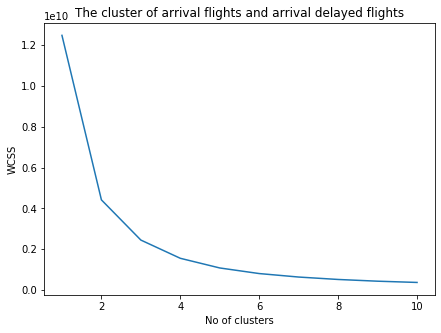

CPU times: user 1.58 s, sys: 26.5 ms, total: 1.61 s
Wall time: 1.62 s


In [15]:
%%time

#find out cluster using Elbow method
plt.figure(figsize= (7,5))
plt.plot(range(1,11),wcss)
plt.title('The cluster of arrival flights and arrival delayed flights')
plt.xlabel('No of clusters')
plt.ylabel('WCSS')
plt.style.use('bmh')
plt.savefig('cluster1Graph.png',dpi=400, bbox_inches='tight')
plt.show()

In [16]:
%%time

#from graph we got 3 clusters

kmeansmodel = KMeans(n_clusters = 3, init = 'k-means++', random_state= 0)
y_kmeans= kmeansmodel.fit_predict(x)
y_kmeans

CPU times: user 7.67 s, sys: 1.08 s, total: 8.75 s
Wall time: 2.73 s


array([0, 0, 0, ..., 0, 0, 0], dtype=int32)

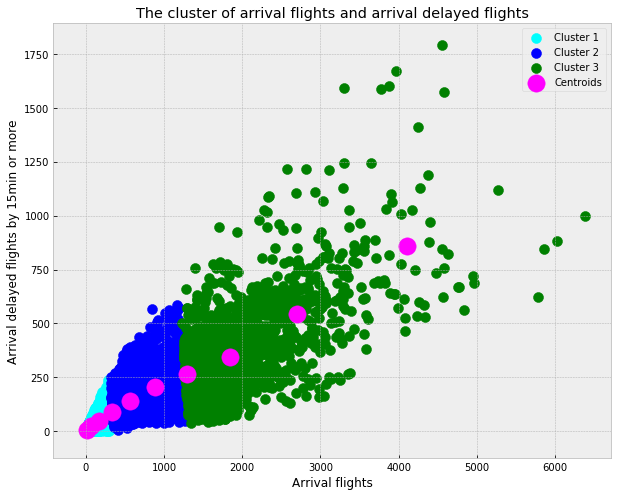

CPU times: user 14.9 s, sys: 307 ms, total: 15.2 s
Wall time: 14.8 s


In [17]:
%%time

#plotting cluster graph along with centroids
plt.figure(figsize= (10,8))
plt.scatter(x[y_kmeans == 0, 0], x[y_kmeans == 0, 1], s = 100, c = 'cyan', label = 'Cluster 1')
plt.scatter(x[y_kmeans == 1, 0], x[y_kmeans == 1, 1], s = 100, c = 'blue', label = 'Cluster 2')
plt.scatter(x[y_kmeans == 2, 0], x[y_kmeans == 2, 1], s = 100, c = 'green', label = 'Cluster 3')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 300, c = 'magenta', label = 'Centroids')
plt.title('The cluster of arrival flights and arrival delayed flights')
plt.xlabel('Arrival flights')
plt.ylabel('Arrival delayed flights by 15min or more')
plt.style.use('bmh')
plt.legend()
plt.savefig('cluster2Graph.png',dpi=400, bbox_inches='tight')
plt.show()


CLUSTER 1 : Low flights, Lowest delayed CLUSTER and centroid distance is near to each other.

2 : Average arrivals, Average delayed CLUSTER

3 : High arrival, High delayed CLUSTER and centroid point distance has been increased over a period

Our target would be cluster 3 wherein carrier companies need to improve their performance for further not getting delayed

# Exploratory Data Analysis

# Which is busiest airport in United States?

In [20]:
dfairpot = df[['year','month','carrier','carrier_name','airport','airport_name',
               'arr_flights','arr_del15','carrier_ct','weather_ct',
               'nas_ct','security_ct','late_aircraft_ct','arr_cancelled','arr_diverted']]
dfairpot= dfairpot.groupby(['airport_name']).mean().reset_index()
dfairpot.head()

,airport_name,year,month,arr_flights,arr_del15,carrier_ct,weather_ct,nas_ct,security_ct,late_aircraft_ct,arr_cancelled,arr_diverted
0,"Aberdeen, SD: Aberdeen Regional",2015.551020,6.602041,60.642857,6.285714,2.257449,0.360612,1.765102,0.000000,1.902959,0.979592,0.173469
1,"Abilene, TX: Abilene Regional",2010.017544,6.425439,169.258772,36.061404,14.716711,3.961272,5.977544,0.056798,11.348640,3.885965,0.162281
2,"Adak Island, AK: Adak",2011.288557,6.537313,8.641791,1.606965,0.509303,0.077413,0.538358,0.016965,0.465025,0.557214,0.014925
3,"Aguadilla, PR: Rafael Hernandez",2012.171429,6.534066,52.789011,13.848352,5.371648,0.390725,3.665736,0.072769,4.347560,0.764835,0.074725
4,"Akron, OH: Akron-Canton Regional",2011.328330,6.582552,124.475610,26.941839,8.961492,1.359193,5.811135,0.021135,10.788959,2.424953,0.232645


<Figure size 432x288 with 0 Axes>

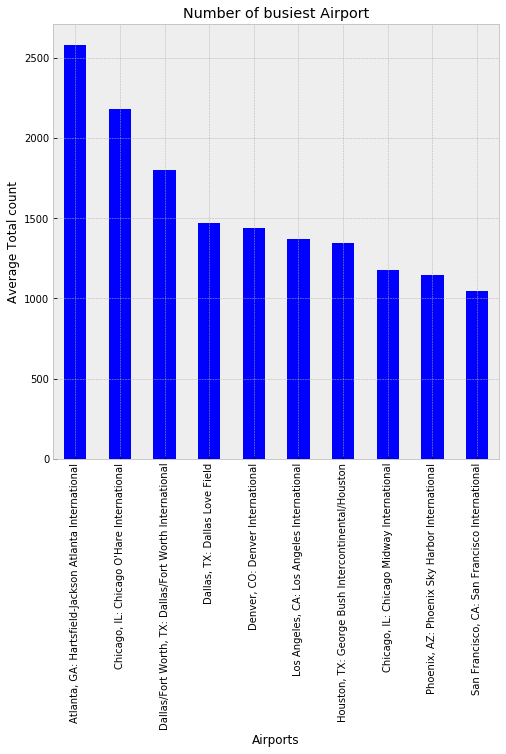

In [21]:
plt.figure()
plt.figure(figsize=(8,8))
dfairpot.groupby("airport_name").arr_flights.mean().sort_values(ascending=False)[:10].plot(kind = 'bar',colors = 'blue')
plt.title('Number of busiest Airport')
plt.xlabel('Airports')
plt.ylabel('Average Total count')
plt.savefig('Graph1.png',dpi=300, bbox_inches='tight')
plt.show()



**Atlanta** is the busiest airport amongst top 10 airport in United States.

# At Which airport most flight has been cancelled?

<Figure size 432x288 with 0 Axes>

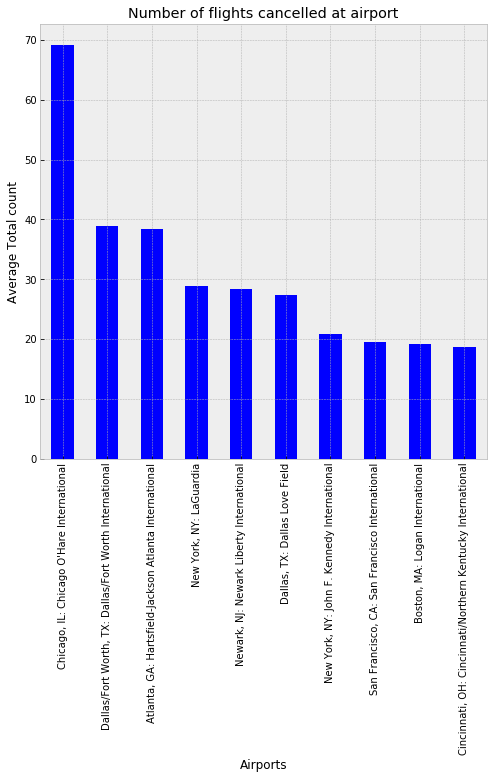

In [22]:
plt.figure()
plt.figure(figsize=(8,8))
dfairpot.groupby("airport_name").arr_cancelled.mean().sort_values(ascending=False)[:10].plot(kind='bar',
                                                                                           colors= 'blue')
plt.title('Number of flights cancelled at airport')
plt.xlabel('Airports')
plt.ylabel('Average Total count')
plt.savefig('Graph2.png',dpi=300, bbox_inches='tight')
plt.show()


At **Chicago O'Hare international** airport has been most flights cancelled.

# At which airport most flights has been diverted?

<Figure size 432x288 with 0 Axes>

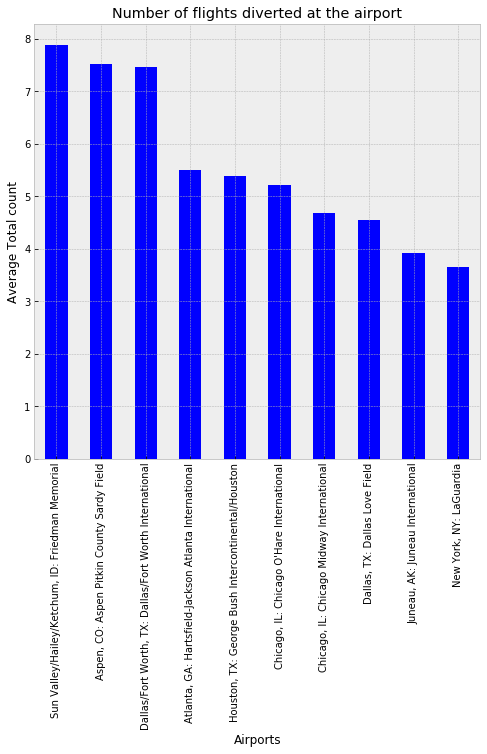

In [23]:
plt.figure()
plt.figure(figsize=(8,8))
dfairpot.groupby("airport_name").arr_diverted.mean().sort_values(ascending=False)[:10].plot(kind ='bar',colors ='blue')
plt.title('Number of flights diverted at the airport')
plt.xlabel('Airports')
plt.ylabel('Average Total count')
plt.savefig('Graph3.png',dpi=300, bbox_inches='tight')
plt.show()


At **Sun Valley, Aspen and Dallas fort worth inetrnational** airport most flights has been diverted

# Problem statement

## **The study focus on which are the best airlines has most reliable carriers.** 

In [19]:
dfcarrier = df[['year','month','carrier','carrier_name','airport','airport_name',
               'arr_flights','arr_del15','carrier_ct','weather_ct',
               'nas_ct','security_ct','late_aircraft_ct','arr_cancelled','arr_diverted']]
dfcarrier= dfcarrier.groupby(['carrier_name']).mean().reset_index()
dfcarrier.head()

,carrier_name,year,month,arr_flights,arr_del15,carrier_ct,weather_ct,nas_ct,security_ct,late_aircraft_ct,arr_cancelled,arr_diverted
0,ATA Airlines d/b/a ATA,2004.399782,6.875817,197.672113,38.450980,7.149967,0.262952,19.800000,0.366187,10.871874,2.028322,0.087146
1,AirTran Airways Corporation,2008.772394,6.577139,349.067146,69.921927,13.210239,0.622456,26.814306,0.000000,29.274893,3.417829,0.801869
2,Alaska Airlines Inc.,2012.076741,6.549112,260.460264,44.479199,12.357491,0.817403,16.541396,0.320614,14.442357,2.698134,0.716067
3,Allegiant Air,2018.621709,6.107897,70.852779,15.079298,4.191355,0.909734,3.671371,0.072099,6.234972,0.488463,0.177771
4,Aloha Airlines Inc.,2006.695652,6.652174,353.940711,25.193676,12.877391,0.160316,2.296364,0.211304,9.648419,4.644269,0.142292


# Which carrier is most arrived at airports?

<Figure size 432x288 with 0 Axes>

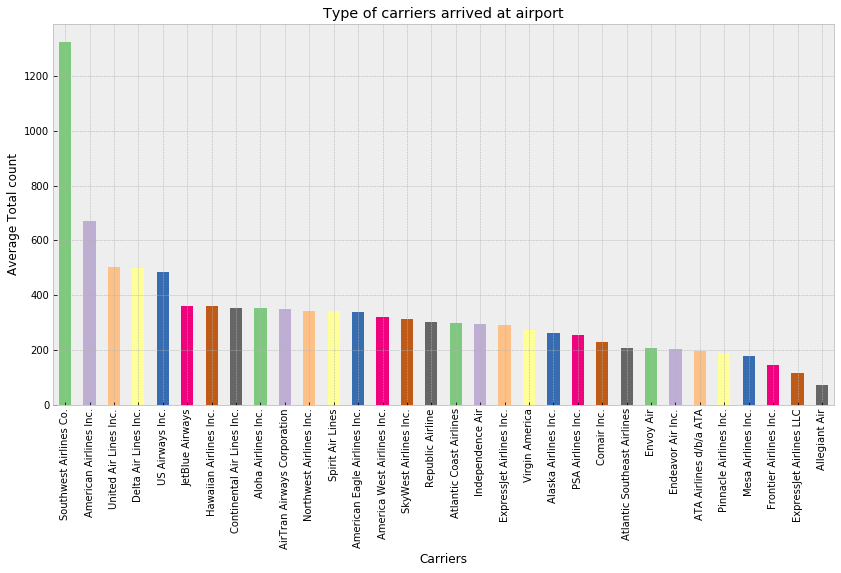

In [20]:
plt.figure()
plt.figure(figsize=(14,7))
dfcarrier.groupby("carrier_name").arr_flights.mean().sort_values(ascending=False).plot(kind='bar',
                                                                                           colors=plt.cm.Accent.colors)
plt.title('Type of carriers arrived at airport')
plt.xlabel('Carriers')
plt.ylabel('Average Total count')
plt.savefig('Graph4.png',dpi=400, bbox_inches='tight')
plt.show()

<Figure size 432x288 with 0 Axes>

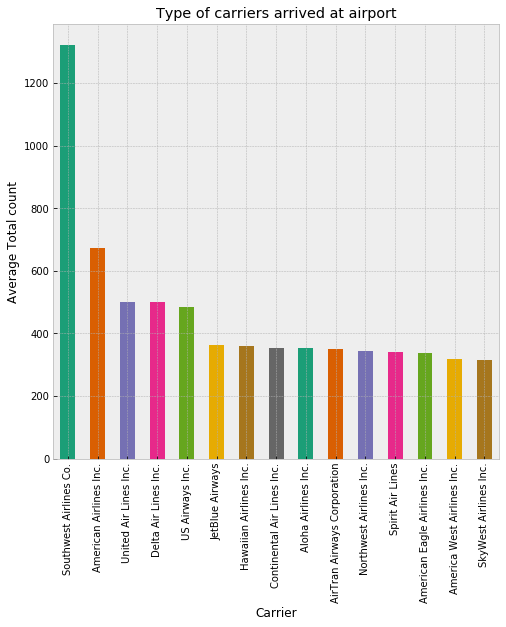

In [21]:
plt.figure()
plt.figure(figsize=(8,8))
dfcarrier.groupby("carrier_name").arr_flights.mean().sort_values(ascending=False)[:15].plot(kind='bar',
                                                                                           colors=plt.cm.Dark2.colors)
plt.title('Type of carriers arrived at airport')
plt.xlabel('Carrier')
plt.ylabel('Average Total count')
plt.savefig('Graph5.png',dpi=400, bbox_inches='tight')
plt.show()


<Figure size 432x288 with 0 Axes>

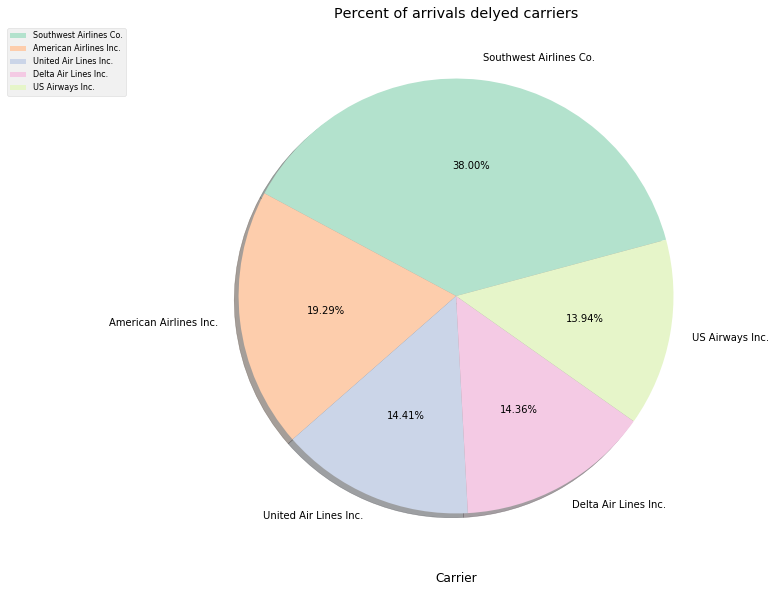

In [35]:
#arr_delay: Total time (minutes) of delayed flights.

plt.figure()
plt.figure(figsize=(10,10))
dfcarrier.groupby("carrier_name").arr_flights.mean().sort_values(ascending=False)[:5].plot(kind='pie',
                                                                                         autopct='%1.2f%%',
                                                                                            startangle=15, 
                                                                                            shadow = True,
                                                                                           colors=plt.cm.Pastel2.colors)
plt.title('Percent of arrivals delyed carriers')
plt.xlabel('Carrier')
plt.legend(bbox_to_anchor=(-0.1, 1.),fontsize=8,loc="best")
plt.ylabel("")
plt.savefig('piechart1.png', bbox_inches='tight')

plt.show()

Out of 32 carriers I have selected top 15 busiest carriers for Analysis.

**Southwest Airline comapny** has more number of arrivals comapared to its competitors. 

# Which carriers are most delayed at airport?

<Figure size 432x288 with 0 Axes>

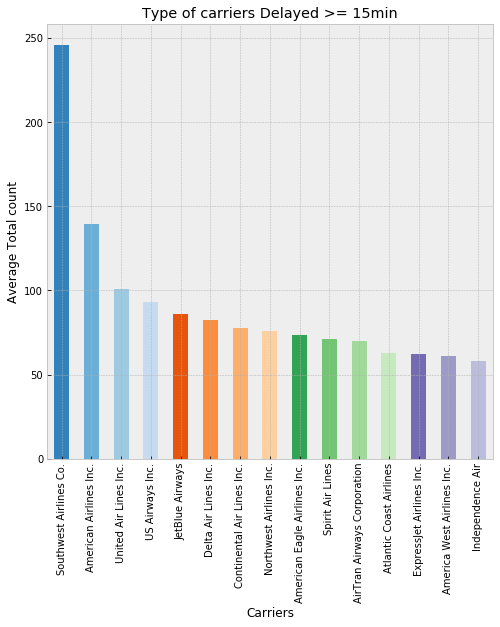

In [28]:
plt.figure()
plt.figure(figsize=(8,8))
dfcarrier.groupby("carrier_name").arr_del15.mean().sort_values(ascending=False)[:15].plot(kind = 'bar',
                                                                                          colors = plt.cm.tab20c.colors)
plt.title('Type of carriers Delayed >= 15min')
plt.xlabel('Carriers')
plt.ylabel('Average Total count')
plt.savefig('Graph6.png',dpi=400, bbox_inches='tight')
plt.show()


<Figure size 432x288 with 0 Axes>

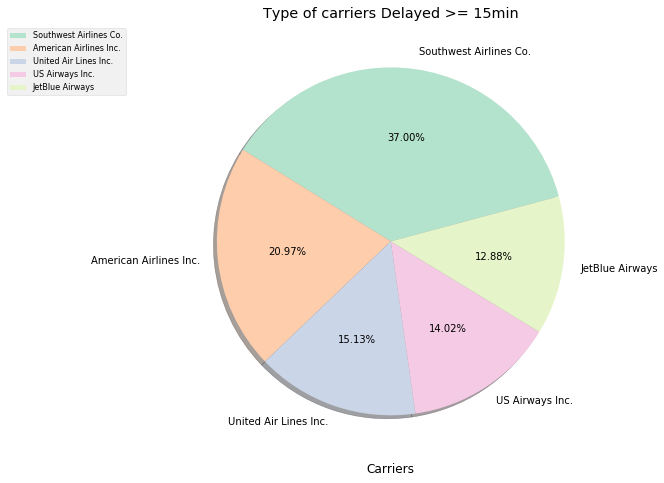

In [37]:
plt.figure()
plt.figure(figsize=(8,8))
cmap = plt.get_cmap('Spectral')
colors = [cmap(i) for i in np.linspace(0, 1, 8)]
dfcarrier.groupby("carrier_name").arr_del15.mean().sort_values(ascending=False)[:5].plot(kind='pie',
                                                                                         autopct='%1.2f%%',
                                                                                            startangle=15, 
                                                                                            shadow = True,
                                                                                           colors=plt.cm.Pastel2.colors)
plt.title('Type of carriers Delayed >= 15min')
plt.xlabel('Carriers')
plt.legend(bbox_to_anchor=(-0.1, 1.),fontsize=8,loc="best")
plt.ylabel("")
plt.savefig('piechart2.png', bbox_inches='tight')

plt.show()


In this part of analysis I observed southwest airlines has most number of delayed compared to its competitors because they have most number of flyings and arrivals count. Whereas only flights are listed above delayed by greater than equal to 15 mintues.

# Which carrier has been most cancelled at airports?

<Figure size 432x288 with 0 Axes>

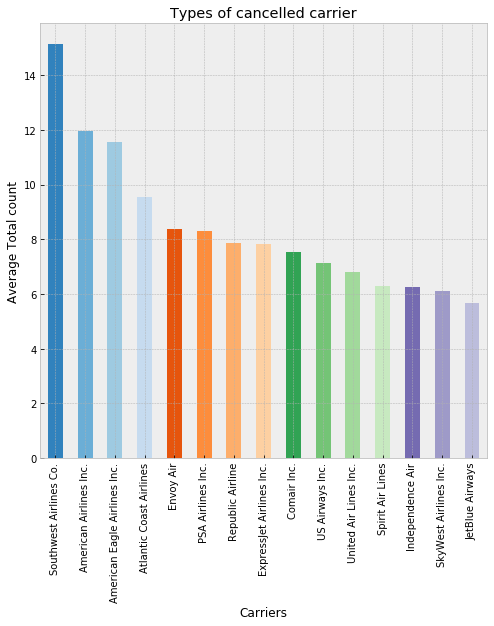

In [30]:
plt.figure()
plt.figure(figsize=(8,8))
dfcarrier.groupby("carrier_name").arr_cancelled.mean().sort_values(ascending=False)[:15].plot(kind = 'bar',
                                                                                          colors = plt.cm.tab20c.colors)
plt.title('Types of cancelled carrier')
plt.xlabel('Carriers')
plt.ylabel('Average Total count')
plt.savefig('Graph7.png',dpi=400, bbox_inches='tight')
plt.show()

<Figure size 432x288 with 0 Axes>

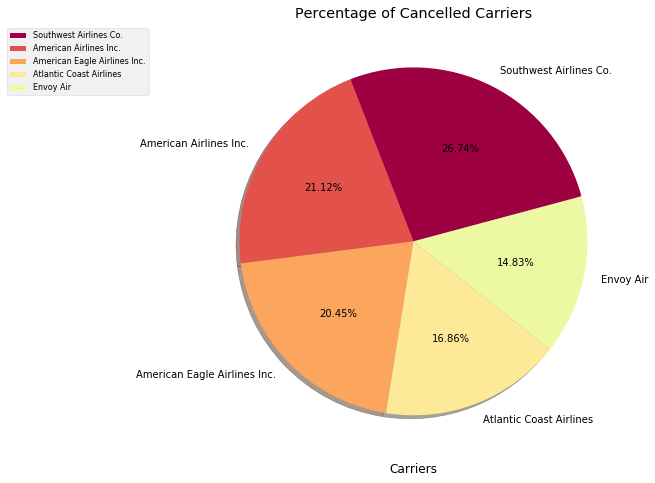

In [34]:
plt.figure()
plt.figure(figsize=(8,8))
cmap = plt.get_cmap('Spectral')
colors = [cmap(i) for i in np.linspace(0, 1, 8)]
dfcarrier.groupby("carrier_name").arr_cancelled.mean().sort_values(ascending=False)[:5].plot(kind='pie',
                                                                                         autopct='%1.2f%%',
                                                                                              startangle=15,
                                                                                              shadow = True,
                                                                                             colors=colors)
plt.title('Percentage of Cancelled Carriers')
plt.xlabel('Carriers')
plt.legend(bbox_to_anchor=(-0.1, 1.),fontsize=8,loc="best")
plt.ylabel("")
plt.savefig('piechart3.png', bbox_inches='tight')

plt.show()

# Which carrier has been divered at the airport?

<Figure size 432x288 with 0 Axes>

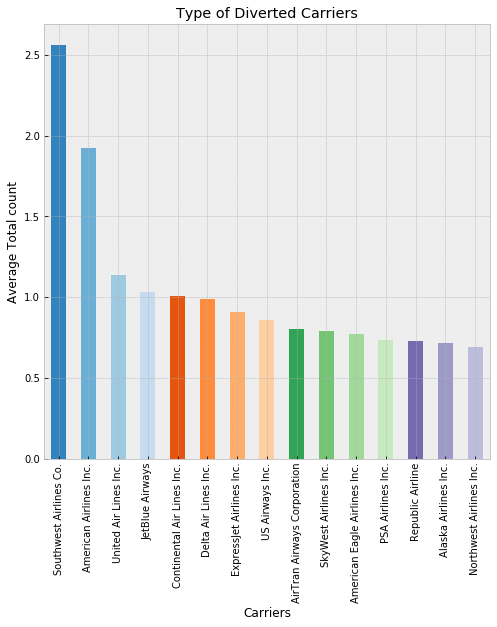

In [32]:
plt.figure()
plt.figure(figsize=(8,8))
dfcarrier.groupby("carrier_name").arr_diverted.mean().sort_values(ascending=False)[:15].plot(kind = 'bar',
                                                                                          colors = plt.cm.tab20c.colors)
plt.title('Type of Diverted Carriers')
plt.xlabel('Carriers')
plt.ylabel('Average Total count')
plt.savefig('Graph8.png',dpi=400, bbox_inches='tight')
plt.show()

<Figure size 432x288 with 0 Axes>

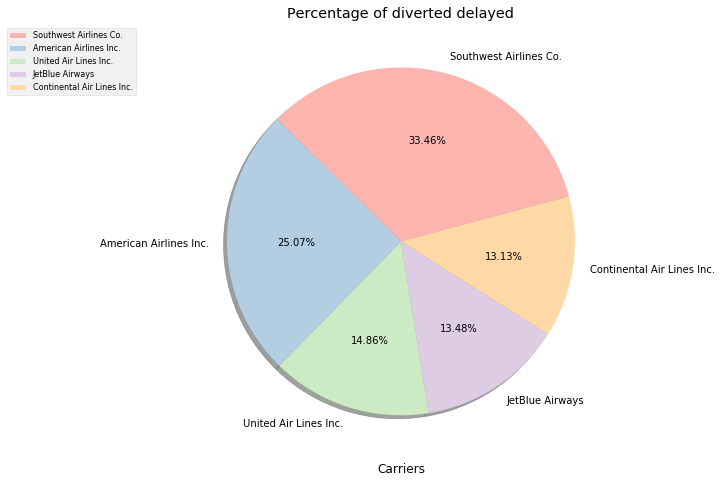

In [33]:
plt.figure()
plt.figure(figsize=(8,8))
dfcarrier.groupby("carrier_name").arr_diverted.mean().sort_values(ascending=False)[:5].plot(kind='pie',
                                                                                         autopct='%1.2f%%',
                                                                                             startangle=15, 
                                                                                             shadow = True,
                                                                                            colors=plt.cm.Pastel1.colors)
plt.title('Percentage of diverted delayed')
plt.xlabel('Carriers')
plt.legend(bbox_to_anchor=(-0.1, 1.),fontsize=8,loc="best")
plt.ylabel("")
plt.savefig('piechart4.png', bbox_inches='tight')

plt.show()

So far we have seen arrival count, delayed count, cancelled count and diverted count in which we can see usual trend for top 3 carrier those are not reliable, whereas trend form Jet Blue to Spirit Airlines are steady. 

# What are the most delayed reasons for the carrier?

In [25]:
dfdelayed = df[['carrier','carrier_name','arr_delay','carrier_delay',
                'weather_delay','nas_delay','security_delay','late_aircraft_delay']]
dfdelayed= dfdelayed.groupby(['carrier_name']).mean().reset_index()
dfdelayed.head()

,carrier_name,arr_delay,carrier_delay,weather_delay,nas_delay,security_delay,late_aircraft_delay
0,ATA Airlines d/b/a ATA,2225.654684,441.725490,25.202614,949.856209,14.063181,794.807190
1,AirTran Airways Corporation,3926.668871,623.882962,48.281524,1267.291445,0.000000,1987.212940
2,Alaska Airlines Inc.,2197.137733,712.314884,59.492035,582.223305,11.258352,831.849158
3,Allegiant Air,1080.610010,394.692558,75.208970,160.726357,2.650959,447.331167
4,Aloha Airlines Inc.,1037.237154,572.814229,9.079051,62.976285,7.395257,384.972332


In [26]:
import matplotlib.pyplot as plt


<Figure size 432x288 with 0 Axes>

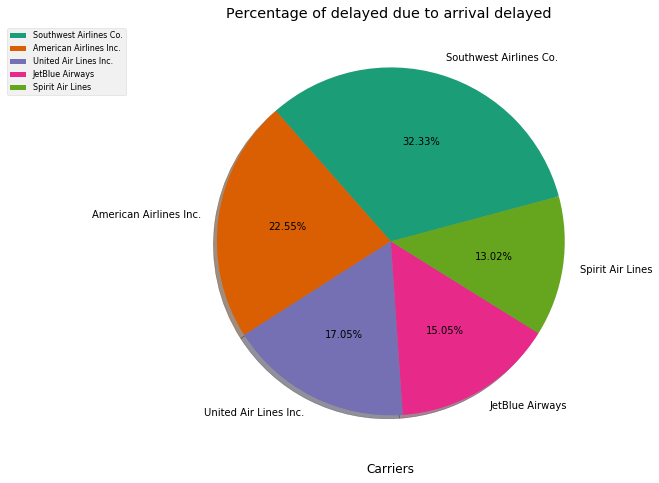

In [27]:
#arr_delay: Total time (minutes) of delayed flights.

plt.figure()
plt.figure(figsize=(10,8))
dfdelayed.groupby("carrier_name").arr_delay.mean().sort_values(ascending=False)[:5].plot(kind='pie',
                                                                                         autopct='%1.2f%%',
                                                                                          startangle=15, 
                                                                                          shadow = True,
                                                                                         colors=plt.cm.Dark2.colors)
plt.title('Percentage of delayed due to arrival delayed ')
plt.xlabel('Carriers')
plt.legend(bbox_to_anchor=(-0.1, 1.),fontsize=8,loc="best")
plt.ylabel("")
plt.savefig('piechart5.png', bbox_inches='tight')
plt.show()


<Figure size 432x288 with 0 Axes>

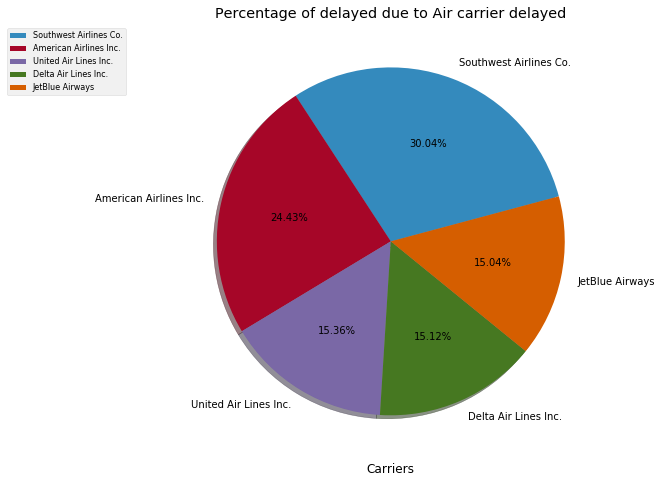

In [28]:
#carrier_delay: Total time (minutes) of delayed flights due to air carrier.

plt.figure()
plt.figure(figsize=(10,8))
dfdelayed.groupby("carrier_name").carrier_delay.mean().sort_values(ascending=False)[:5].plot(kind='pie',
                                                                                         autopct='%1.2f%%',startangle=15, shadow = True)
plt.title('Percentage of delayed due to Air carrier delayed')
plt.xlabel('Carriers')
plt.legend(bbox_to_anchor=(-0.1, 1.),fontsize=8,loc="best")
plt.ylabel("")
plt.savefig('piechart6.png', bbox_inches='tight')
plt.show()

<Figure size 432x288 with 0 Axes>

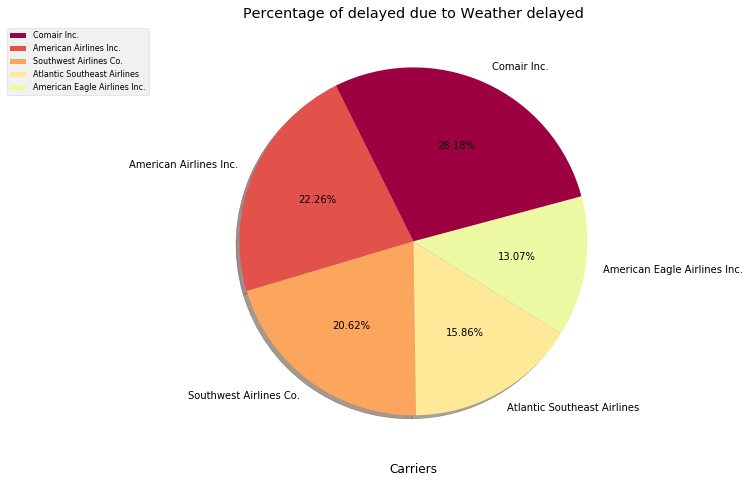

In [29]:
#weather_delay: Total time (minutes) of delayed flights due to weather.
plt.figure()
plt.figure(figsize=(10,8))
cmap = plt.get_cmap('Spectral')
colors = [cmap(i) for i in np.linspace(0, 1, 8)]
dfdelayed.groupby("carrier_name").weather_delay.mean().sort_values(ascending=False)[:5].plot(kind='pie',
                                                                                         autopct='%1.2f%%',
                                                                                              startangle=15, 
                                                                                              shadow = True,
                                                                                             colors=colors)
plt.title('Percentage of delayed due to Weather delayed')
plt.xlabel('Carriers')
plt.legend(bbox_to_anchor=(-0.1, 1.),fontsize=8,loc="best")
plt.ylabel("")
plt.savefig('piechart7.png', bbox_inches='tight')
plt.show()

<Figure size 432x288 with 0 Axes>

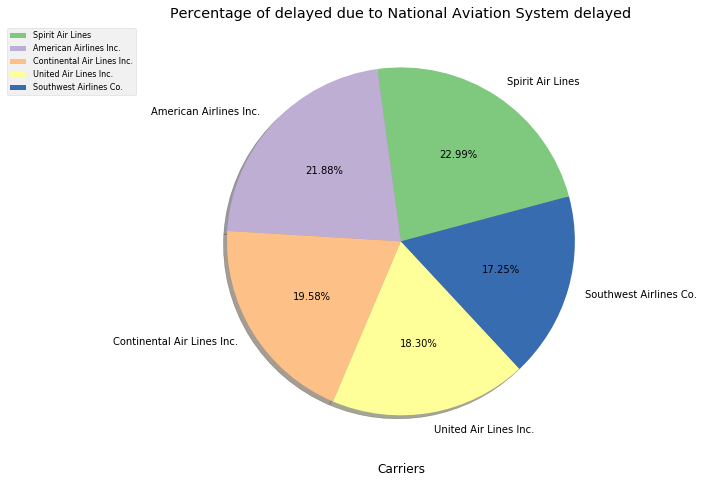

In [30]:
#nas_delay: Total time (minutes) of delayed flights due to National Aviation System.
plt.figure()
plt.figure(figsize=(10,8))
dfdelayed.groupby("carrier_name").nas_delay.mean().sort_values(ascending=False)[:5].plot(kind='pie',
                                                                                         autopct='%1.2f%%',
                                                                                          startangle=15, 
                                                                                          shadow = True,
                                                                                         colors=plt.cm.Accent.colors)
plt.title('Percentage of delayed due to National Aviation System delayed')
plt.xlabel('Carriers')
plt.legend(bbox_to_anchor=(-0.1, 1.),fontsize=8,loc="best")
plt.ylabel("")
plt.savefig('piechart8.png', bbox_inches='tight')
plt.show()

<Figure size 432x288 with 0 Axes>

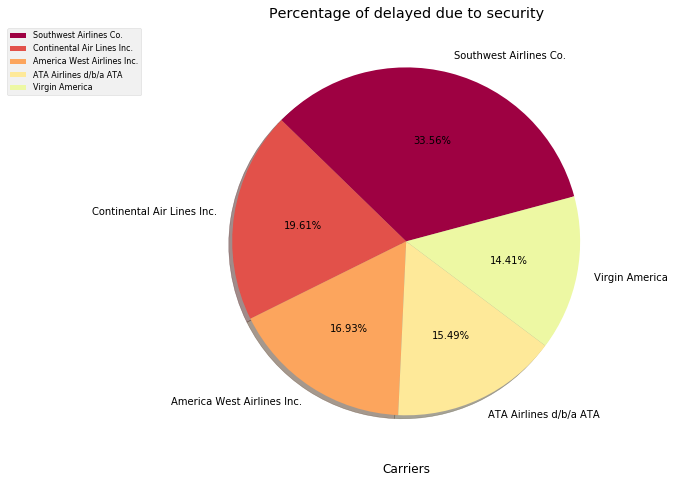

In [31]:
#security_delay: Total time (minutes) of delayed flights due to security.
plt.figure()
plt.figure(figsize=(10,8))
cmap = plt.get_cmap('Spectral')
colors = [cmap(i) for i in np.linspace(0, 1, 8)]
dfdelayed.groupby("carrier_name").security_delay.mean().sort_values(ascending=False)[:5].plot(kind='pie',
                                                                                         autopct='%1.2f%%',
                                                                                               startangle=15, 
                                                                                               shadow = True,
                                                                                              colors=colors)

plt.title('Percentage of delayed due to security')
plt.xlabel('Carriers')
plt.legend(bbox_to_anchor=(-0.1, 1.),fontsize=8,loc="best")
plt.ylabel("")
plt.savefig('piechart9.png', bbox_inches='tight')
plt.show()

<Figure size 432x288 with 0 Axes>

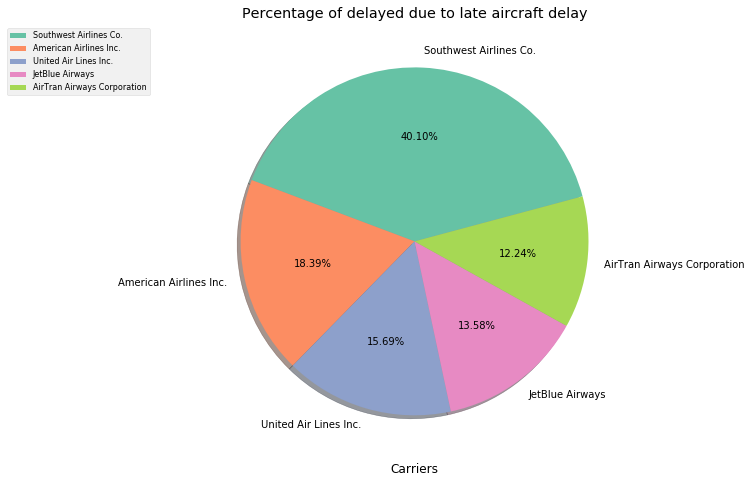

In [32]:
#late_aircraft_delay: Total time (minutes) of delayed flights due to a previous flight using the same aircraft being late.
plt.figure()
plt.figure(figsize=(10,8))
dfdelayed.groupby("carrier_name").late_aircraft_delay.mean().sort_values(ascending=False)[:5].plot(kind='pie',
                                                                                         autopct='%1.2f%%',
                                                                                                    startangle=15, 
                                                                                                    shadow = True,
                                                                                                    colors=plt.cm.Set2.colors)
plt.title('Percentage of delayed due to late aircraft delay')
plt.xlabel('Carriers')
plt.legend(bbox_to_anchor=(-0.1, 1.),fontsize=8,loc="best")
plt.ylabel("")
plt.savefig('piechart10.png', bbox_inches='tight')
plt.show()

Mainly there are 6 reasons for flights delayed those are listed and shown above in form of pie charts.

In analysis I observed **Southwest airline and American Airline** are top 2 airlines with most number of delays.

# Conclusion

Based on the data, Analysis and visualization I concluded that Southwest Airlines and American airlines are not reliable airlines because of most number of delays.

Whereas Jet blue, Spirit airline and other few airlines are reliable to choose for flying based on their arrival count, delayed count, cancelled count, diverted count and their delayed reasons.


# Suggestion

In suggestion for the airlines are getting delayed like **Southwest airline, American airline** etc. should improve thier performance based on delayed causes and increase quality of service and thereby gain customer satisfaction.